In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
def log_like(points, mu, sigma, pi, n, k):
    log_t = []
    for i in range(n):
        parts = []
        for j in range(k):
            parts.append(pi[j]*gauss(points[i], mu[j], sigma[j]))
        total = sum(parts)
        log_t.append(math.log(total))
    L = sum(log_t)
#     print(L)
    return L

In [3]:
def gauss(x,mu,sigma):
    sig_sq = pow(sigma,2) 
    d = (x-mu)
    d = -(d*d)/(2*sig_sq)
    fx = math.exp(d)
    fx /= math.sqrt(2*math.pi*sig_sq) 
    return fx

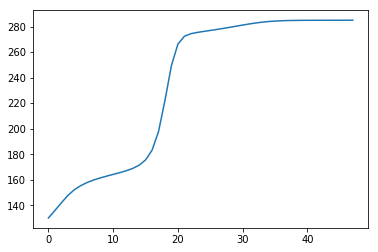

In [4]:
def main():
    file = open("data1.txt")
    points = []
    for line in file:
        a = line[:-1]
        points.append(float(a))

    k = 3 # number of Gaussians
    n = len(points)
    threshold = 0.001

    #Initialization
    pi = []
    mu = []
    sigma = []
    for i in range(k):
        pi.append(1/k)
        mu.append(random.random())
        sigma.append(random.random())

    L = math.inf
    log_list = []

    count = 0
    while(1):
        count+=1
        old_L = L
        #Expectation
        p = {}
        for i in range(n):
            parts = []
            for j in range(k):
                parts.append(pi[j]*gauss(points[i], mu[j], sigma[j]))
            total = sum(parts)
            for j in range(k):
                p[(i,j)] = parts[j]/total
        
        ni = [sum([p[(i,j)] for i in range(n)]) for j in range(k)]

        #Maximization
        for j in range(k):
            mu[j] = sum(p[(i,j)]*points[i] for i in range(n)) / ni[j]
            
            sigma[j] = sum(p[(i,j)]*points[i]*points[i] for i in range(n))/ni[j]
            sigma[j] -= mu[j]**2
            sigma[j] = math.sqrt(sigma[j])

            pi[j] = ni[j]/n 

        #log likelihood
        L = log_like(points, mu, sigma, pi, n, k)
        log_list.append(L)
        if abs(old_L - L) < threshold:
            break

    plt.plot(log_list)
    plt.show()
#     print(count)
#     print(mu, sigma, pi)
    pass

if __name__ == '__main__':
    main()